In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Datei mit UTF-16-Codierung einlesen
data = pd.read_csv('data_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')
values = pd.read_csv('values_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')
variables = pd.read_csv('variables_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')

In [2]:
data

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,A001,A001s,A002,A002_05,...,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
0,191,NaN,NaN,CQ2023,interview,2023-01-23 10:11:10,276,NaN,1.0,NaN,...,NaN,2023-01-23 10:15:10,0,0,3,21,50,42,"1,25",17
1,203,NaN,NaN,CQ2023,interview,2023-01-25 08:56:50,276,NaN,2.0,NaN,...,NaN,2023-01-25 11:27:54,0,0,9,9,13,13,"0,68",2
2,207,NaN,NaN,CQ2023,interview,2023-01-25 09:01:56,276,NaN,1.0,NaN,...,NaN,2023-01-25 09:02:12,0,0,3,3,0,0,"1,79",50
3,208,NaN,NaN,CQ2023,interview,2023-01-25 09:02:26,-9,NaN,-9.0,NaN,...,NaN,2023-01-25 09:04:12,0,0,12,12,83,81,"1,59",100
4,209,NaN,NaN,CQ2023,interview,2023-01-25 09:03:06,-9,NaN,NaN,NaN,...,NaN,2023-01-25 09:03:16,0,0,2,2,100,100,"2,29",73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2548,NaN,NaN,CQ2023,interview,2023-04-06 17:45:24,276,NaN,NaN,NaN,...,NaN,2023-04-06 17:46:09,0,0,2,2,0,0,"0,92",14
809,2552,NaN,NaN,CQ2023,interview,2023-04-07 10:38:23,276,NaN,1.0,NaN,...,NaN,2023-04-07 10:57:23,1,0,38,38,9,3,"1,13",17
810,2553,NaN,NaN,CQ2023,interview,2023-04-07 15:32:18,276,NaN,5.0,NaN,...,NaN,2023-04-07 15:35:30,0,0,21,21,29,20,"1,55",56
811,2572,NaN,NaN,CQ2023,interview,2023-04-12 11:55:23,826,NaN,5.0,Independent analytical informatics consultant,...,NaN,2023-04-12 12:06:22,0,0,29,29,3,1,"1,09",15


In [3]:
values

,VAR,RESPONSE,MEANING
0,A001,1001,Apsny
1,A001,4,Afghanestan
2,A001,8,Albania
3,A001,10,Antarctic
4,A001,12,Algeria
...,...,...,...
488,C008,-9,nicht beantwortet
489,FINISHED,0,abgebrochen
490,FINISHED,1,ausgefüllt
491,Q_VIEWER,0,Teilnehmer


In [4]:
variables

,VAR,LABEL,TYPE,INPUT,QUESTION
0,CASE,Interview-Nummer (fortlaufend),METRIC,SYSTEM,NaN
1,SERIAL,Seriennummer (sofern verwendet),TEXT,SYSTEM,NaN
2,REF,Referenz (sofern im Link angegeben),TEXT,SYSTEM,NaN
3,QUESTNNR,"Fragebogen, der im Interview verwendet wurde",TEXT,SYSTEM,NaN
4,MODE,Interview-Modus,TEXT,SYSTEM,NaN
...,...,...,...,...,...
190,MAXPAGE,"Letzte Seite, die im Fragebogen bearbeitet wurde",METRIC,SYSTEM,NaN
191,MISSING,Anteil fehlender Antworten in Prozent,METRIC,SYSTEM,NaN
192,MISSREL,Anteil fehlender Antworten (gewichtet nach Rel...,METRIC,SYSTEM,NaN
193,TIME_RSI,Maluspunkte für schnelles Ausfüllen,METRIC,SYSTEM,NaN


## Data Cleaning

In [5]:
df_data = pd.DataFrame (data)

In [6]:
# Spaltenüberschriften als Liste ausgeben
spalten_ueberschriften = df_data.columns.tolist()
print(spalten_ueberschriften)

['CASE', 'SERIAL', 'REF', 'QUESTNNR', 'MODE', 'STARTED', 'A001', 'A001s', 'A002', 'A002_05', 'A003', 'A003_07', 'A004', 'A004_01', 'A004_02', 'A004_03', 'A004_04', 'A004_05', 'A004_06', 'A004_07', 'A004_08', 'A004_09', 'A004_10', 'A004_11', 'A004_12', 'A004_13', 'A004_13a', 'B001', 'B001_01', 'B001_02', 'B001_03', 'B001_04', 'B001_05', 'B001_06', 'B001_07', 'B001_08', 'B001_08a', 'B002', 'B003_01', 'B004', 'B005_01', 'B006', 'B006_01', 'B006_02', 'B006_03', 'B006_04', 'B006_04a', 'B006_05', 'B006_06', 'B007', 'B025_01', 'B008_CN', 'B008x01', 'B008x02', 'B008x03', 'B008x04', 'B008x05', 'B008x06', 'B008x07', 'B008x08', 'B008x09', 'B027_01', 'B009', 'B026_01', 'B010', 'B011', 'B012', 'B013_01', 'B014', 'B014_01', 'B014_02', 'B014_03', 'B014_04', 'B014_05', 'B014_06', 'B014_07', 'B014_08', 'B014_08a', 'B015', 'B015_01', 'B015_02', 'B015_03', 'B015_04', 'B015_05', 'B015_06', 'B015_08', 'B015_08a', 'B015_07', 'B016', 'B016_01', 'B016_02', 'B016_03', 'B016_04', 'B016_05', 'B016_06', 'B016_07'

In [7]:
# Teilnehmenden betrachten. Gibt es Durchklicker bei diesem Fragebogen?
# Subset erstellen
participants = df_data [['CASE', 'Q_VIEWER']]
participants.groupby('Q_VIEWER').count()

,CASE
Q_VIEWER,
0,813


Das System bewertet automatisch, ob sich jemand nur durch den Fragebogen klickt. Nach dem System scheint es keine Durchklicker zu geben.

In [8]:
# Daten weiter bereinigen. Spalten und Zeilen mit NaN entfernen.
# DataFrame mit ausgewählten Spalten erstellen
selected_columns = ['CASE', 'A001', 'A001s', 'A002', 'A002_05', 'A003', 'A003_07', 'A004', 'A004_01', 'A004_02', 'A004_03', 'A004_04', 'A004_05', 'A004_06', 'A004_07', 'A004_08', 'A004_09', 'A004_10', 'A004_11', 'A004_12', 'A004_13', 'A004_13a', 'B001', 'B001_01', 'B001_02', 'B001_03', 'B001_04', 'B001_05', 'B001_06', 'B001_07', 'B001_08', 'B001_08a', 'B002', 'B003_01', 'B004', 'B005_01', 'B006', 'B006_01', 'B006_02', 'B006_03', 'B006_04', 'B006_04a', 'B006_05', 'B006_06', 'B007', 'B025_01', 'B008_CN', 'B008x01', 'B008x02', 'B008x03', 'B008x04', 'B008x05', 'B008x06', 'B008x07', 'B008x08', 'B008x09', 'B027_01', 'B009', 'B026_01', 'B010', 'B011', 'B012', 'B013_01', 'B014', 'B014_01', 'B014_02', 'B014_03', 'B014_04', 'B014_05', 'B014_06', 'B014_07', 'B014_08', 'B014_08a', 'B015', 'B015_01', 'B015_02', 'B015_03', 'B015_04', 'B015_05', 'B015_06', 'B015_08', 'B015_08a', 'B015_07', 'B016', 'B016_01', 'B016_02', 'B016_03', 'B016_04', 'B016_05', 'B016_06', 'B016_07', 'B016_09', 'B016_09a', 'B016_08', 'B017', 'B017_01', 'B017_02', 'B017_03', 'B017_04', 'B017_05', 'B017_05a', 'B018', 'B018_01', 'B019', 'B019_01', 'B019_02', 'B019_03', 'B019_04', 'B019_05', 'B019_05a', 'B019_06', 'B019_07', 'B019_08', 'B019_09', 'B019_10', 'B019_10a', 'B020_01', 'B021', 'B021_01', 'B022_01', 'B023_01', 'B024', 'B024_01', 'B024_02', 'B024_03', 'B024_04', 'B024_05', 'B024_06', 'B024_07', 'B024_08', 'B024_08a', 'C001', 'C002', 'C003', 'C003_01', 'C004', 'C005_01', 'C006', 'C008', 'C008_03', 'C009_01']
df_questions_2023 = df_data[selected_columns]
df_questions_2023

,CASE,A001,A001s,A002,A002_05,A003,A003_07,A004,A004_01,A004_02,...,C001,C002,C003,C003_01,C004,C005_01,C006,C008,C008_03,C009_01
0,191,276,NaN,1.0,NaN,7.0,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,203,276,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,207,276,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,208,-9,NaN,-9.0,NaN,-9.0,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,209,-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2548,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,2552,276,NaN,1.0,NaN,1.0,NaN,1.0,1.0,2.0,...,1.0,1.0,2.0,NaN,2.0,Cannot guarantee that every co-worker responsi...,1.0,1.0,NaN,"Processing platform, conversion of the data in..."
810,2553,276,NaN,5.0,NaN,7.0,NaN,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,2572,826,NaN,5.0,Independent analytical informatics consultant,7.0,Owner,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Die Anzahl der Spalten hat sich nicht verändert, daher gibt es keine Spalten ohne Werte.

In [9]:
# Filtere die Spalten, deren Werte nur NaN sind
result_columns = df_questions_2023.columns[df_questions_2023.isna().all()]
# Zeige die Spaltennamen an
print(result_columns)

Index([], dtype='object')


Da der Index leer ist, enthält jede Spalte mindestens einen Wert.

In [10]:
# DataFrame bereinigen, indem Reihen mit nur NaN-Werten entfernt werden
df_questions_2023_clean = df_questions_2023.dropna(axis=0, how='all')
df_questions_2023_clean

,CASE,A001,A001s,A002,A002_05,A003,A003_07,A004,A004_01,A004_02,...,C001,C002,C003,C003_01,C004,C005_01,C006,C008,C008_03,C009_01
0,191,276,NaN,1.0,NaN,7.0,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,203,276,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,207,276,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,208,-9,NaN,-9.0,NaN,-9.0,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,209,-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2548,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,2552,276,NaN,1.0,NaN,1.0,NaN,1.0,1.0,2.0,...,1.0,1.0,2.0,NaN,2.0,Cannot guarantee that every co-worker responsi...,1.0,1.0,NaN,"Processing platform, conversion of the data in..."
810,2553,276,NaN,5.0,NaN,7.0,NaN,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,2572,826,NaN,5.0,Independent analytical informatics consultant,7.0,Owner,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Da sich die Anzahl der Reihen nicht geändert hat, gibt es keine komplett leeren Reihen. Daher wird geschaut, welche Reihen nach den bibliografischen Angaben (Spalte A003) leer sind.

In [11]:
# Filtere die Zeilen, bei denen nach der Spalte A002 keine Einträge mehr folgen (alle Werte sind NaN)
result_rows = df_questions_2023[df_questions_2023.iloc[:, df_questions_2023.columns.get_loc('A002')+1:].isna().all(axis=1)]

# Zeige die Zeilen an
print(result_rows)

     CASE  A001 A001s  A002 A002_05  A003 A003_07  A004  A004_01  A004_02  \
2     207   276   NaN   1.0     NaN   NaN     NaN   NaN      NaN      NaN   
4     209    -9   NaN   NaN     NaN   NaN     NaN   NaN      NaN      NaN   
5     213    -9   NaN   NaN     NaN   NaN     NaN   NaN      NaN      NaN   
6     219    -9   NaN   NaN     NaN   NaN     NaN   NaN      NaN      NaN   
24    277    -9   NaN   NaN     NaN   NaN     NaN   NaN      NaN      NaN   
25    280   756   NaN   1.0     NaN   NaN     NaN   NaN      NaN      NaN   
26    283    -9   NaN   NaN     NaN   NaN     NaN   NaN      NaN      NaN   
27    287    -9   NaN   NaN     NaN   NaN     NaN   NaN      NaN      NaN   
103   520    -9   NaN   NaN     NaN   NaN     NaN   NaN      NaN      NaN   
112   555    -9   NaN   NaN     NaN   NaN     NaN   NaN      NaN      NaN   
118   570    -9   NaN   NaN     NaN   NaN     NaN   NaN      NaN      NaN   
119   571   276   NaN   1.0     NaN   NaN     NaN   NaN      NaN      NaN   

 45 Teilnehmende haben somit keine Informationen außer teilweise Landzugehörigkeit und Position in die Umfrage gegeben.

In [12]:
# Entferne die gefundenen leeren Zeilen aus dem DataFrame 
# Erzeuge einen bereinigten DataFrame
df_cleanquest_2023 = df_questions_2023.drop(result_rows.index)

# Zeige den neuen DataFrame
df_cleanquest_2023

,CASE,A001,A001s,A002,A002_05,A003,A003_07,A004,A004_01,A004_02,...,C001,C002,C003,C003_01,C004,C005_01,C006,C008,C008_03,C009_01
0,191,276,NaN,1.0,NaN,7.0,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,203,276,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,208,-9,NaN,-9.0,NaN,-9.0,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,220,276,NaN,1.0,NaN,3.0,NaN,1.0,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,222,276,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,2545,276,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,...,1.0,1.0,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN
807,2546,276,NaN,1.0,NaN,2.0,NaN,7.0,1.0,2.0,...,1.0,1.0,1.0,TBD.,1.0,NaN,1.0,1.0,NaN,TBD.
809,2552,276,NaN,1.0,NaN,1.0,NaN,1.0,1.0,2.0,...,1.0,1.0,2.0,NaN,2.0,Cannot guarantee that every co-worker responsi...,1.0,1.0,NaN,"Processing platform, conversion of the data in..."
810,2553,276,NaN,5.0,NaN,7.0,NaN,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_values = pd.DataFrame (values)

In [14]:
df_values

,VAR,RESPONSE,MEANING
0,A001,1001,Apsny
1,A001,4,Afghanestan
2,A001,8,Albania
3,A001,10,Antarctic
4,A001,12,Algeria
...,...,...,...
488,C008,-9,nicht beantwortet
489,FINISHED,0,abgebrochen
490,FINISHED,1,ausgefüllt
491,Q_VIEWER,0,Teilnehmer


In [15]:
df_cleanquest_2023.columns

Index(['CASE', 'A001', 'A001s', 'A002', 'A002_05', 'A003', 'A003_07', 'A004',
       'A004_01', 'A004_02',
       ...
       'C001', 'C002', 'C003', 'C003_01', 'C004', 'C005_01', 'C006', 'C008',
       'C008_03', 'C009_01'],
      dtype='object', length=141)

## A01. In which country have you done most of your research in the last 3 years?

In [16]:
df_values["VAR"].unique()

array(['A001', 'A002', 'A003', 'A004_01', 'A004_02', 'A004_03', 'A004_04',
       'A004_05', 'A004_06', 'A004_07', 'A004_08', 'A004_09', 'A004_10',
       'A004_11', 'A004_12', 'A004_13', 'B001_01', 'B001_02', 'B001_03',
       'B001_04', 'B001_05', 'B001_06', 'B001_07', 'B001_08', 'B002',
       'B004', 'B006_01', 'B006_02', 'B006_03', 'B006_04', 'B006_05',
       'B006_06', 'B007', 'B008x01', 'B008x02', 'B008x03', 'B008x04',
       'B008x05', 'B008x06', 'B008x07', 'B008x08', 'B008x09', 'B009',
       'B010', 'B011', 'B012', 'B014_01', 'B014_02', 'B014_03', 'B014_04',
       'B014_05', 'B014_06', 'B014_07', 'B014_08', 'B015_01', 'B015_02',
       'B015_03', 'B015_04', 'B015_05', 'B015_06', 'B015_08', 'B015_07',
       'B016_01', 'B016_02', 'B016_03', 'B016_04', 'B016_05', 'B016_06',
       'B016_07', 'B016_09', 'B016_08', 'B017_01', 'B017_02', 'B017_03',
       'B017_04', 'B017_05', 'B018', 'B019_01', 'B019_02', 'B019_03',
       'B019_04', 'B019_05', 'B019_06', 'B019_07', 'B019_08', 

In [17]:
values_A001=df_values[df_values["VAR"]=="A001"]

In [18]:
values_A001

,VAR,RESPONSE,MEANING
0,A001,1001,Apsny
1,A001,4,Afghanestan
2,A001,8,Albania
3,A001,10,Antarctic
4,A001,12,Algeria
...,...,...,...
250,A001,887,Yemen
251,A001,894,Zambia
252,A001,716,Zimbabwe
253,A001,-2,sonstige Texteingabe


In [19]:
df_cleanquest_2023["A001-m"]=df_cleanquest_2023["A001"].map(values_A001.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])

In [20]:
df_cleanquest_2023["A001-m"]

0                Germany
1                Germany
3      nicht beantwortet
7                Germany
8                Germany
             ...        
806              Germany
807              Germany
809              Germany
810              Germany
811       United Kingdom
Name: A001-m, Length: 768, dtype: object

In [21]:
df_cleanquest_2023[["CASE","A001","A001-m"]]

,CASE,A001,A001-m
0,191,276,Germany
1,203,276,Germany
3,208,-9,nicht beantwortet
7,220,276,Germany
8,222,276,Germany
...,...,...,...
806,2545,276,Germany
807,2546,276,Germany
809,2552,276,Germany
810,2553,276,Germany


In [22]:
value_counts = df_cleanquest_2023['A001-m'].value_counts()
print(value_counts)

Germany                               669
Netherlands                            22
United Kingdom                         10
France                                  8
India                                   8
nicht beantwortet                       8
United States                           7
Switzerland                             7
Austria                                 4
Belgium                                 3
Czech Republic                          3
China (People's Republic of China)      2
Spain                                   2
Pakistan                                2
Canada                                  1
Sudan                                   1
Japan                                   1
Ukraine                                 1
Norway                                  1
South Korea                             1
Iceland                                 1
Bangladesch                             1
Poland                                  1
Israel                            

In [23]:
# Definiere die NFDI4Chem-Farben
petrol_rgb = (0/255, 156/255, 188/255)
orange_rgb = (238/255, 116/255, 0/255)
yellow_rgb = (241/255, 222/255, 30/255)

<AxesSubplot:>

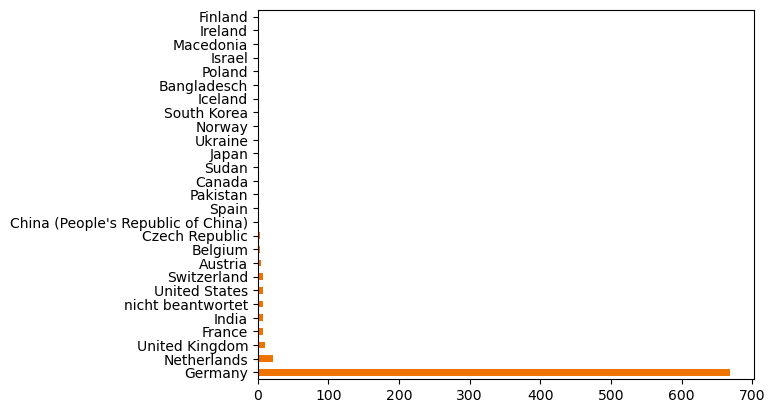

In [24]:
df_cleanquest_2023['A001-m'].value_counts().plot.barh(color=orange_rgb)

Text(0, 0.5, '')

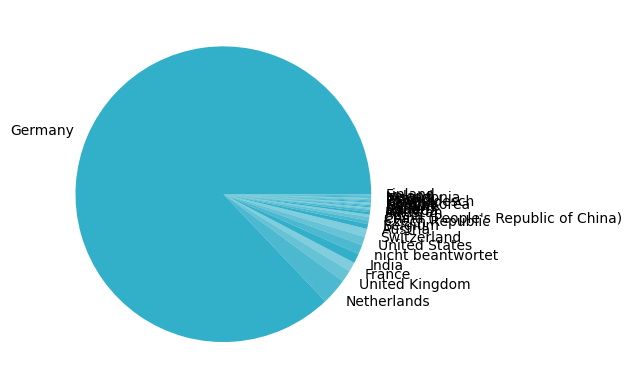

In [25]:
# Definiere die RGB-Farbe (0, 156, 188) und die Transparenzwerte
petrol = (0, 156, 188)
transparency_values = [0.8, 0.7, 0.6, 0.5]  # Höhere Werte bedeuten mehr Transparenz

# Erzeuge die Farben mit unterschiedlicher Transparenz
colorp = [(petrol[0]/255, petrol[1]/255, petrol[2]/255, alpha) for alpha in transparency_values]

df_cleanquest_2023['A001-m'].value_counts().plot.pie(colors=colorp)

plt.ylabel('')

In [26]:
df_A001 = df_cleanquest_2023['A001-m'].value_counts().to_frame()
df_A001

,A001-m
Germany,669
Netherlands,22
United Kingdom,10
France,8
India,8
nicht beantwortet,8
United States,7
Switzerland,7
Austria,4
Belgium,3


In [27]:
df_A001.reset_index(inplace=True)
print(df_A001.columns)

Index(['index', 'A001-m'], dtype='object')


In [28]:
df_A001.rename(columns={'index': 'country', 'A001-m': 'quantity'}, inplace=True)
df_A001

,country,quantity
0,Germany,669
1,Netherlands,22
2,United Kingdom,10
3,France,8
4,India,8
5,nicht beantwortet,8
6,United States,7
7,Switzerland,7
8,Austria,4
9,Belgium,3


In [29]:
df_A001['quantity'] = df_A001['quantity'].astype('int')
print(df_A001.columns)

Index(['country', 'quantity'], dtype='object')


In [30]:
# Zeilen nach Häufigkeit gruppieren und zusammenfassen
grouped_df_A001 = df_A001.groupby('quantity')['country'].apply(', '.join).reset_index()
print(grouped_df_A001)

   quantity                                            country
0         1  Canada, Sudan, Japan, Ukraine, Norway, South K...
1         2  China (People's Republic of China), Spain, Pak...
2         3                            Belgium, Czech Republic
3         4                                            Austria
4         7                         United States, Switzerland
5         8                   France, India, nicht beantwortet
6        10                                     United Kingdom
7        22                                        Netherlands
8       669                                            Germany


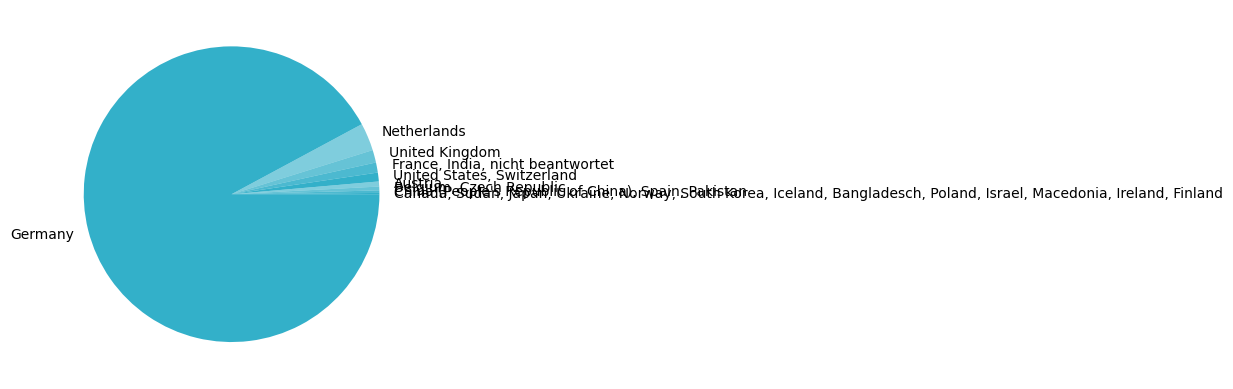

In [31]:
# Tortendiagramm erstellen
fmy_colors = ['b', 'r', 'c', 'y', 'g', 'm']
grouped_df_A001['quantity'].plot.pie(labels=grouped_df_A001['country'], colors=colorp)

plt.ylabel('')

# Diagramm zeigen
plt.show()

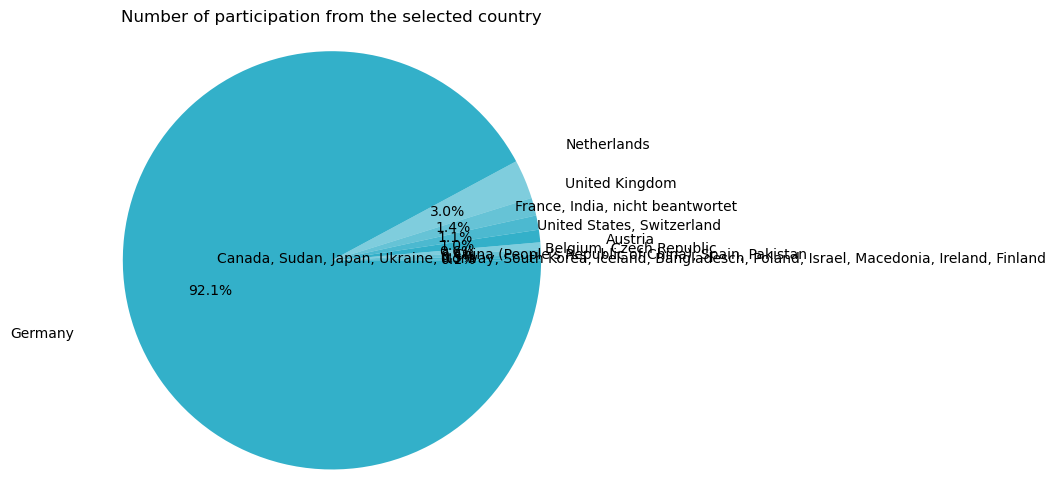

In [32]:
# Tortendiagramm erstellen
plt.figure(figsize=(8, 6))
wedges, _, _ = plt.pie(grouped_df_A001['quantity'], autopct='%1.1f%%', colors=colorp)

# Beschriftungen außerhalb des Tortendiagramms anzeigen
for wedge, label in zip(wedges, grouped_df_A001['country']):
    angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = 1.3 * wedge.r * 1.1 * np.cos(np.deg2rad(angle))
    y = 1.3 * wedge.r * 1.1 * np.sin(np.deg2rad(angle))
    plt.text(x, y, label, ha='center', va='center', fontsize=10)

plt.title('Number of participation from the selected country')
plt.axis('equal')

# Diagramm anzeigen
plt.show()

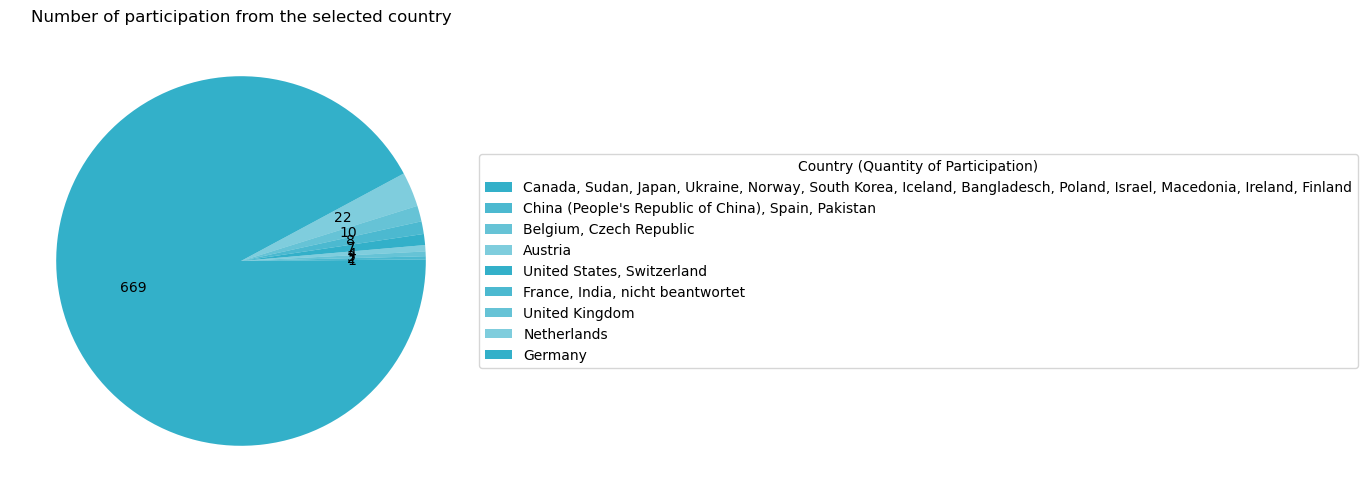

In [33]:
# Tortendiagramm erstellen
plt.figure(figsize=(8, 6))
wedges, _, _ = plt.pie(grouped_df_A001['quantity'],colors=colorp, autopct=lambda p: '{:.0f}'.format(p * sum(grouped_df_A001['quantity']) / 100))

# Legende für die Beschriftungen außerhalb des Tortendiagramms anzeigen
plt.legend(wedges, grouped_df_A001['country'], title='Country (Quantity of Participation)', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Number of participation from the selected country')

# Diagramm zeigen
plt.show()

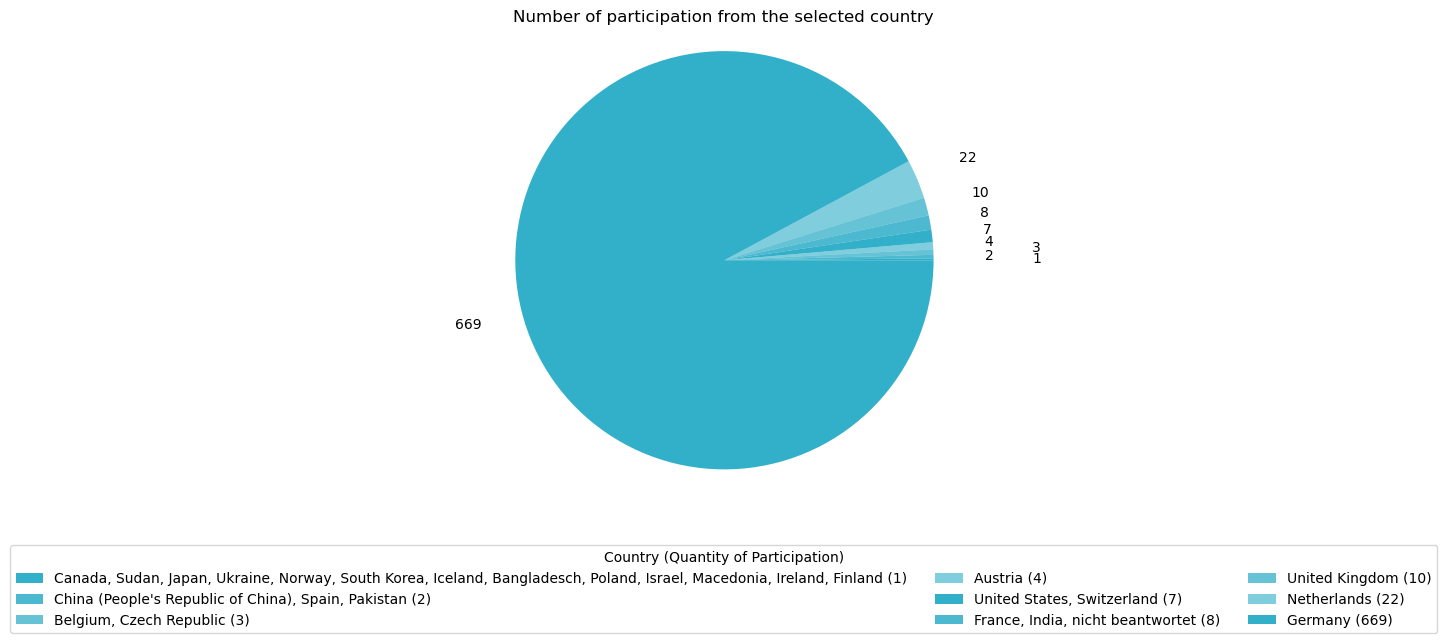

In [34]:
# Tortendiagramm erstellen
plt.figure(figsize=(8, 6))
wedges, _, _ = plt.pie(grouped_df_A001['quantity'], colors=colorp,autopct='')

# Beschriftung außerhalb des Kreises
for i, (wedge, _) in enumerate(zip(wedges, _)):
    angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    radius = 1.15 * wedge.r
    x = radius * np.cos(np.deg2rad(angle))
    y = radius * np.sin(np.deg2rad(angle))
    
    # Passe die Position der Werte mit den Indizes 0 und 2 an
    if i in [0, 2]:
        distance = 0.3
    else:
        distance = 0.1
    
    dx = distance * radius * np.cos(np.deg2rad(angle))
    dy = distance * radius * np.sin(np.deg2rad(angle))

# Beschriftung außerhalb des Tortendiagramms
    plt.annotate(str(grouped_df_A001['quantity'][i]), xy=(x, y), xytext=(x + dx, y + dy), ha='center', va='center')

# Legende für die Beschriftungen unterhalb des Tortendiagramms
legend_labels = [f"{country} ({quantity})" for country, quantity in zip(grouped_df_A001['country'], grouped_df_A001['quantity'])]
plt.legend(legend_labels, title='Country (Quantity of Participation)', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.title('Number of participation from the selected country')
plt.axis('equal')

# Diagramm zeigen
plt.show()

In [35]:
# Freitextantworten zur Frage anzeigen ->Spalte A001s
df_cleanquest_2023["A001s"].value_counts()

Series([], Name: A001s, dtype: int64)

669 Researchers who participated in the survey are coming from Germany. 22 are coming from the Netherlands and 10 from UK. From Switzerland, France and India participated 8 per country and also 8 did answered. Just 7 did their research in the US and Switzerland each and 4 in Austria. 3 each are coming from Czech Republic and Belgium and 2 each from Pakistan, China and Spain. Only one each did her/ his research in Israel, South Korea, Norway, Ukraine, Sudan, Canada, Bangladesch, Japan, Macadonia, Ireland, Poland, Iceland and Finland. Just one belong to any country.

## A02. To which type of institution do you belong?

In [36]:
print(df_cleanquest_2023.columns)

Index(['CASE', 'A001', 'A001s', 'A002', 'A002_05', 'A003', 'A003_07', 'A004',
       'A004_01', 'A004_02',
       ...
       'C002', 'C003', 'C003_01', 'C004', 'C005_01', 'C006', 'C008', 'C008_03',
       'C009_01', 'A001-m'],
      dtype='object', length=142)


In [37]:
df_cleanquest_2023[["CASE","A002"]]

,CASE,A002
0,191,1.0
1,203,2.0
3,208,-9.0
7,220,1.0
8,222,2.0
...,...,...
806,2545,1.0
807,2546,1.0
809,2552,1.0
810,2553,5.0


In [38]:
values_A002=df_values[df_values["VAR"]=="A002"]
values_A002

,VAR,RESPONSE,MEANING
255,A002,1,University
256,A002,2,Non-university research institution
257,A002,3,Industry
258,A002,4,Infrastructure facility/IT centre
259,A002,5,Other:
260,A002,-9,nicht beantwortet


In [39]:
df_cleanquest_2023["A002-m"]=df_cleanquest_2023["A002"].map(values_A002.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])
df_cleanquest_2023["A002-m"]

0                               University
1      Non-university research institution
3                        nicht beantwortet
7                               University
8      Non-university research institution
                      ...                 
806                             University
807                             University
809                             University
810                                 Other:
811                                 Other:
Name: A002-m, Length: 768, dtype: object

In [40]:
df_cleanquest_2023[["CASE","A002","A002-m"]]

,CASE,A002,A002-m
0,191,1.0,University
1,203,2.0,Non-university research institution
3,208,-9.0,nicht beantwortet
7,220,1.0,University
8,222,2.0,Non-university research institution
...,...,...,...
806,2545,1.0,University
807,2546,1.0,University
809,2552,1.0,University
810,2553,5.0,Other:


In [41]:
value_counts = df_cleanquest_2023['A002-m'].value_counts()
value_counts

University                             603
Non-university research institution     91
Industry                                46
Other:                                  21
Infrastructure facility/IT centre        4
nicht beantwortet                        3
Name: A002-m, dtype: int64

<AxesSubplot:>

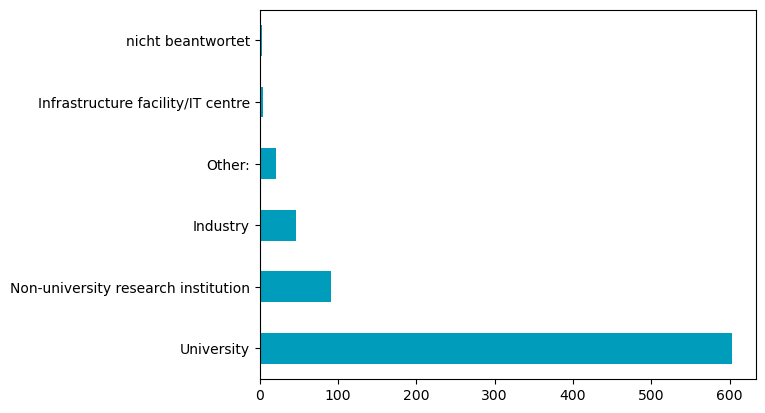

In [42]:
df_cleanquest_2023['A002-m'].value_counts().plot.barh(color=petrol_rgb)

In [43]:
df_A002 = df_cleanquest_2023['A002-m'].value_counts().to_frame()

df_A002.reset_index(inplace=True)

df_A002.rename(columns={'index': 'affiliation', 'A002-m': 'quantity'}, inplace=True)
df_A002

,affiliation,quantity
0,University,603
1,Non-university research institution,91
2,Industry,46
3,Other:,21
4,Infrastructure facility/IT centre,4
5,nicht beantwortet,3


In [44]:
# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte A002_5s
df_A002_a = df_cleanquest_2023['A002_05'].value_counts().to_frame()

df_A002_a.reset_index(inplace=True)

df_A002_a.rename(columns={'index': 'affiliation', 'A002_05': 'quantity'}, inplace=True)
df_A002_a

,affiliation,quantity
0,Governmental research institution,1
1,Fachhochschule,1
2,ChemInformatic consultant,1
3,2 affiliations University and npon-univ. res.i...,1
4,"network for process analytics, former university",1
5,Indian Institute of Technology Kanpur,1
6,Government lab,1
7,…,1
8,patent attorney firm,1
9,University and non-University research institu...,1


In [45]:
# Fachhochschule, University of Applied Science and Arts und University of Applied Sciences durch 'University of Applied Science' in Spalte 'affiliation' ersetzen

df_A002_a['affiliation'] = df_A002_a['affiliation'].replace(['Fachhochschule', 'University of Applied Science and Arts', 'University of Applied Sciences'], 'University of Applied Science')

df_A002_a['affiliation'].value_counts()

University of Applied Science                          3
Governmental research institution                      1
now retired from Industry                              1
Freelancer                                             1
University Hospital                                    1
University + University of applied "sciences"          1
KIT is both: University & National Research Inst.      1
University, but now Industry                           1
freelancer analytical lab Finke \nowner DOC-WOK An.    1
University and non-University research institution     1
patent attorney firm                                   1
…                                                      1
Government lab                                         1
Indian Institute of Technology Kanpur                  1
network for process analytics, former university       1
2 affiliations University and npon-univ. res.inst.     1
ChemInformatic consultant                              1
Independent analytical informat

In [46]:
df_A002_a

,affiliation,quantity
0,Governmental research institution,1
1,University of Applied Science,1
2,ChemInformatic consultant,1
3,2 affiliations University and npon-univ. res.i...,1
4,"network for process analytics, former university",1
5,Indian Institute of Technology Kanpur,1
6,Government lab,1
7,…,1
8,patent attorney firm,1
9,University and non-University research institu...,1


In [47]:
# Überschreibe die Werte in Zeile 3, 9 14 der Spalte 'affiliation' mit 'Two affiliations'
df_A002_a.at[3, 'affiliation'] = 'Two affiliations'
df_A002_a.at[9, 'affiliation'] = 'Two affiliations'
df_A002_a.at[12, 'affiliation'] = 'Two affiliations'
df_A002_a.at[14, 'affiliation'] = 'Two affiliations'

df_A002_a.at[10, 'affiliation'] = 'Freelancer'

df_A002_a.at[5, 'affiliation'] = 'Non-university research institution'

df_A002_a.at[7, 'affiliation'] = 'nicht beantwortet'

df_A002_a

,affiliation,quantity
0,Governmental research institution,1
1,University of Applied Science,1
2,ChemInformatic consultant,1
3,Two affiliations,1
4,"network for process analytics, former university",1
5,Non-university research institution,1
6,Government lab,1
7,nicht beantwortet,1
8,patent attorney firm,1
9,Two affiliations,1


In [48]:
# Ersetze alle Vorkommen von "industry" durch "Industry"
df_A002_a['affiliation'] = df_A002_a['affiliation'].replace(r'(?i).*industry.*', 'Industry', regex=True)

# Ersetze alle Vorkommen von "Government" durch "Governmental"
df_A002_a['affiliation'] = df_A002_a['affiliation'].replace(r'(?i).*government.*', 'Governmental', regex=True)

# Ersetze alle Vorkommen von "freelancer" durch "Freelancer"
df_A002_a['affiliation'] = df_A002_a['affiliation'].replace(r'(?i).*freelancer.*', 'Freelancer', regex=True)

# Ersetze alle Vorkommen von "consultant" durch "Consultant"
df_A002_a['affiliation'] = df_A002_a['affiliation'].replace(r'(?i).*consultant.*', 'Consultant', regex=True)

df_A002_a['affiliation'].value_counts()

Two affiliations                                    4
University of Applied Science                       3
Governmental                                        2
Consultant                                          2
Freelancer                                          2
Industry                                            2
network for process analytics, former university    1
Non-university research institution                 1
nicht beantwortet                                   1
patent attorney firm                                1
University Hospital                                 1
Name: affiliation, dtype: int64

In [49]:
df_A002_a_counted = df_A002_a['affiliation'].value_counts().to_frame()

df_A002_a_counted.reset_index(inplace=True)

df_A002_a_counted.rename(columns={'index': 'affiliation', 'affiliation': 'quantity'}, inplace=True)
df_A002_a_counted

,affiliation,quantity
0,Two affiliations,4
1,University of Applied Science,3
2,Governmental,2
3,Consultant,2
4,Freelancer,2
5,Industry,2
6,"network for process analytics, former university",1
7,Non-university research institution,1
8,nicht beantwortet,1
9,patent attorney firm,1


In [50]:
df_A002_a_counted
df_A002

# Zusammenführen der DataFrames anhand des gemeinsamen Schlüssels 'ID'
df_A002_merge = pd.merge(df_A002, df_A002_a_counted, on='affiliation', how='outer')
df_A002_merge

,affiliation,quantity_x,quantity_y
0,University,603.0,NaN
1,Non-university research institution,91.0,1.0
2,Industry,46.0,2.0
3,Other:,21.0,NaN
4,Infrastructure facility/IT centre,4.0,NaN
5,nicht beantwortet,3.0,1.0
6,Two affiliations,NaN,4.0
7,University of Applied Science,NaN,3.0
8,Governmental,NaN,2.0
9,Consultant,NaN,2.0


In [51]:
# Zusammenführen von quantity_1 und quantity_2 und Summieren der Werte
df_A002_merge['merged_quantity'] = df_A002_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# Entfernen von doppelten Werten in der Spalte "merged_affiliation"
df_A002_merge.drop_duplicates(subset='affiliation', inplace=True)

# Löschen der ursprünglichen Spalten
df_A002_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

df_A002_merge

,affiliation,merged_quantity
0,University,603.0
1,Non-university research institution,92.0
2,Industry,48.0
3,Other:,21.0
4,Infrastructure facility/IT centre,4.0
5,nicht beantwortet,4.0
6,Two affiliations,4.0
7,University of Applied Science,3.0
8,Governmental,2.0
9,Consultant,2.0


In [52]:
# Löschen der Zeile mit Index 3, weil sie in den Freitextantworten aufgeschlüsselt wurde und als solche eingefügt wurden.
df_A002_merge = df_A002_merge.drop(3)
print(df_A002_merge)

                                         affiliation  merged_quantity
0                                         University            603.0
1                Non-university research institution             92.0
2                                           Industry             48.0
4                  Infrastructure facility/IT centre              4.0
5                                  nicht beantwortet              4.0
6                                   Two affiliations              4.0
7                      University of Applied Science              3.0
8                                       Governmental              2.0
9                                         Consultant              2.0
10                                        Freelancer              2.0
11  network for process analytics, former university              1.0
12                              patent attorney firm              1.0
13                               University Hospital              1.0


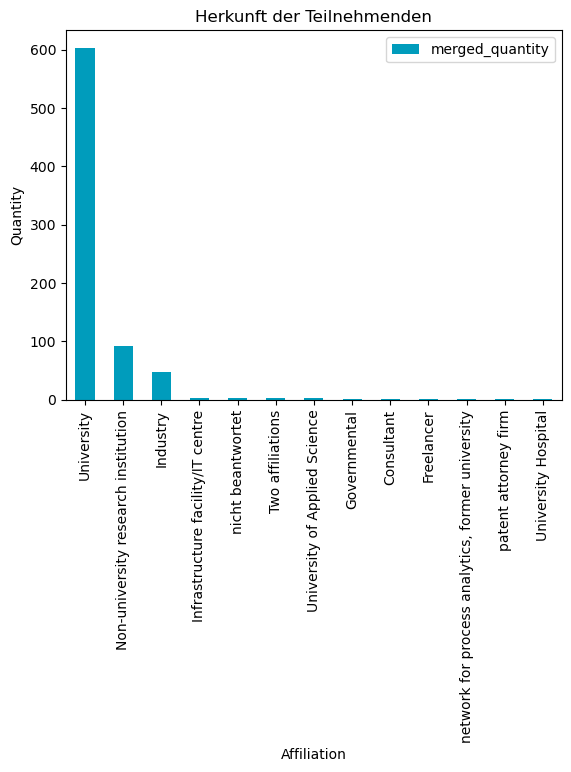

In [53]:
# Setze die Spalte "affiliation_in_total" als Index
df_A002_merge.set_index('affiliation', inplace=True)

# Erstellen des Balkendiagramms mit den Werten aus der quantity-Spalte
df_A002_merge.plot.bar(color=petrol_rgb)

# Beschriftung für die X- und Y-Achse sowie den Titel des Diagramms hinzufügen
plt.xlabel('Affiliation')
plt.ylabel('Quantity')
plt.title('Herkunft der Teilnehmenden')

# Zeige das Diagramm an
plt.show()

## A03. Which position do you have in your institution?

In [54]:
df_cleanquest_2023[["CASE","A003","A003_07"]]

,CASE,A003,A003_07
0,191,7.0,NaN
1,203,2.0,NaN
3,208,-9.0,NaN
7,220,3.0,NaN
8,222,2.0,NaN
...,...,...,...
806,2545,1.0,NaN
807,2546,2.0,NaN
809,2552,1.0,NaN
810,2553,7.0,NaN


In [55]:
values_A003=df_values[df_values["VAR"]=="A003"]
values_A003

,VAR,RESPONSE,MEANING
261,A003,1,Professor
262,A003,2,Postdoc/Research Scientist/Permanent Researcher
263,A003,3,PhD student
264,A003,4,Master student
265,A003,5,Bachelor student
266,A003,6,Researcher in Industry
267,A003,7,Other:
268,A003,-9,nicht beantwortet


In [56]:
df_cleanquest_2023["A003-m"]=df_cleanquest_2023["A003"].map(values_A003.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])
df_cleanquest_2023["A003-m"]

0                                               Other:
1      Postdoc/Research Scientist/Permanent Researcher
3                                    nicht beantwortet
7                                          PhD student
8      Postdoc/Research Scientist/Permanent Researcher
                            ...                       
806                                          Professor
807    Postdoc/Research Scientist/Permanent Researcher
809                                          Professor
810                                             Other:
811                                             Other:
Name: A003-m, Length: 768, dtype: object

In [57]:
df_cleanquest_2023[["CASE","A003","A003-m"]]

,CASE,A003,A003-m
0,191,7.0,Other:
1,203,2.0,Postdoc/Research Scientist/Permanent Researcher
3,208,-9.0,nicht beantwortet
7,220,3.0,PhD student
8,222,2.0,Postdoc/Research Scientist/Permanent Researcher
...,...,...,...
806,2545,1.0,Professor
807,2546,2.0,Postdoc/Research Scientist/Permanent Researcher
809,2552,1.0,Professor
810,2553,7.0,Other:


In [58]:
value_counts = df_cleanquest_2023['A003-m'].value_counts()
value_counts

PhD student                                        250
Postdoc/Research Scientist/Permanent Researcher    185
Professor                                          166
Other:                                              56
Master student                                      55
Researcher in Industry                              36
Bachelor student                                    16
nicht beantwortet                                    4
Name: A003-m, dtype: int64

In [59]:
df_A003 = df_cleanquest_2023['A003-m'].value_counts().to_frame()

df_A003.reset_index(inplace=True)

df_A003.rename(columns={'index': 'position', 'A003-m': 'quantity'}, inplace=True)
df_A003

,position,quantity
0,PhD student,250
1,Postdoc/Research Scientist/Permanent Researcher,185
2,Professor,166
3,Other:,56
4,Master student,55
5,Researcher in Industry,36
6,Bachelor student,16
7,nicht beantwortet,4


In [60]:
# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte A003_07s
df_A003_a = df_cleanquest_2023['A003_07'].value_counts().to_frame()

df_A003_a.reset_index(inplace=True)

df_A003_a.rename(columns={'index': 'position', 'A003_07': 'quantity'}, inplace=True)
df_A003_a

,position,quantity
0,Owner,2
1,technician,2
2,Technician,2
3,Plant Manager,1
4,Junior group leader,1
5,Technical Staff,1
6,Technican,1
7,Laboratory Assistant,1
8,Engineer,1
9,patent attorney,1


In [61]:
# Begriffe werden zusammengefasst, um eine bessere Übersicht zu generieren und diese ggfs. mit den vorgegebenen Begriffen zusammenzuführen.
# Alle Vorkommen von "technician" durch "Technical Staff" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace(['technician', 'Technican', 'Technician', 'laboratory assistant', 'chemical technician', 'Lab Technician', 'Laboratory Assistant'], 'Technical Staff')

# Alle Vorkommen von "Student" durch "Student on teaching profession" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace(['Student Education', 'teacher student', 'Lehramt student', 'Lehramtsstudent (Teaching Student)', 'Lehramt GYM (Education)'], 'Student on teaching profession')

# Alle Vorkommen von "Scientist" und "Assistant" durch "Postdoc/Research Scientist/Permanent Researcher" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace(['Junior Group Leader','Engineer','scentific stuff, M.Sc.', 'Assistant', 'Scientist', 'Like professor but no title and no teaching duties', 'Junior group leader (Habilitand, Emmy Noether)', 'Junior group leader'], 'Postdoc/Research Scientist/Permanent Researcher')
# Alle Vorkommen von "Manager" durch den allgemeinen Begriff "Manager" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace(['Plant Manager','Development Management','Scientific Management ','Pharmacovigilance Manager ','Pharmacovigilance Manager', 'Scientific Management', 'Managing Director', 'Research Manager', 'Product Manager'], 'Manager')

# Alle Vorkommen, die adminitrative Arbeit beinhalten durch "Adminitrative Staff" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace('administrativ','Adminitrative Staff')

# Alle Vorkommen "retired professor" durch "Professor" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace(['retired Professor','retired professor'],'Professor')

# Alle Vorkommen "RDM" durch "RDM Staff" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace(['Research Data Manager','RDM manager','Research data management coordinator'],'Professor')

# Alle Vorkommen, die bibliothekarische Arbeit beinhalten durch "Library Staff" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace(['bib','Chemical Librarian'],'Library Staff')

# Alle Vorkommen mit koordinierender Arbeit durch "Research/ Project Coordinator" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace(['Project Coordinator','Scientific Director of Department', 'Head of laboratory','Research coordination'],'Research/ Project Coordinator')

# "PhD Student +" durch "PhD student" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace('PhD Student + Research Scientist ','PhD student')

# "..." durch "nicht beantwortet" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace('…','nicht beantwortet')

# Alle Vorkommen, die nicht etwas mit Forschung zu tun haben durch "Non-Research Staff" in Spalte 'position' ersetzen
df_A003_a['position'] = df_A003_a['position'].replace(['Assistent and later Freelancer','Owner', 'patent attorney','Specialist Scouting, Consulting & Incubation ','New Business Development','Principal consultant'],'Non-research Staff')

df_A003_a['position'].value_counts()

Technical Staff                                    8
Manager                                            8
Postdoc/Research Scientist/Permanent Researcher    8
Non-research Staff                                 6
Professor                                          5
Student on teaching profession                     5
Research/ Project Coordinator                      4
Library Staff                                      2
nicht beantwortet                                  1
PhD student                                        1
Adminitrative Staff                                1
Name: position, dtype: int64

In [62]:
print(df_A003_a)

                                           position  quantity
0                                Non-research Staff         2
1                                   Technical Staff         2
2                                   Technical Staff         2
3                                           Manager         1
4   Postdoc/Research Scientist/Permanent Researcher         1
5                                   Technical Staff         1
6                                   Technical Staff         1
7                                   Technical Staff         1
8   Postdoc/Research Scientist/Permanent Researcher         1
9                                Non-research Staff         1
10                                nicht beantwortet         1
11  Postdoc/Research Scientist/Permanent Researcher         1
12                                          Manager         1
13                                        Professor         1
14                                      PhD student         1
15      

In [63]:
df_A003_a_counted = df_A003_a['position'].value_counts().to_frame()

df_A003_a_counted.reset_index(inplace=True)

df_A003_a_counted.rename(columns={'index': 'position', 'position': 'quantity'}, inplace=True)
df_A003_a_counted

,position,quantity
0,Technical Staff,8
1,Manager,8
2,Postdoc/Research Scientist/Permanent Researcher,8
3,Non-research Staff,6
4,Professor,5
5,Student on teaching profession,5
6,Research/ Project Coordinator,4
7,Library Staff,2
8,nicht beantwortet,1
9,PhD student,1


In [64]:
df_A003_a_counted
df_A003

# Zusammenführen der DataFrames anhand des gemeinsamen Schlüssels 'position'
df_A003_merge = pd.merge(df_A003, df_A003_a_counted, on='position', how='outer')
df_A003_merge

,position,quantity_x,quantity_y
0,PhD student,250.0,1.0
1,Postdoc/Research Scientist/Permanent Researcher,185.0,8.0
2,Professor,166.0,5.0
3,Other:,56.0,NaN
4,Master student,55.0,NaN
5,Researcher in Industry,36.0,NaN
6,Bachelor student,16.0,NaN
7,nicht beantwortet,4.0,1.0
8,Technical Staff,NaN,8.0
9,Manager,NaN,8.0


In [65]:
# Zusammenführen von quantity_1 und quantity_2 und Summieren der Werte
df_A003_merge['merged_quantity'] = df_A003_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# Entfernen von doppelten Werten in der Spalte "merged_affiliation"
df_A003_merge.drop_duplicates(subset='position', inplace=True)

# Löschen der ursprünglichen Spalten
df_A003_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

df_A003_merge

,position,merged_quantity
0,PhD student,251.0
1,Postdoc/Research Scientist/Permanent Researcher,193.0
2,Professor,171.0
3,Other:,56.0
4,Master student,55.0
5,Researcher in Industry,36.0
6,Bachelor student,16.0
7,nicht beantwortet,5.0
8,Technical Staff,8.0
9,Manager,8.0


In [66]:
# Löschen der Zeile mit Index 3, weil sie in den Freitextantworten aufgeschlüsselt wurde und als solche eingefügt wurden.
df_A003_merge = df_A003_merge.drop(3)
print(df_A003_merge)

                                           position  merged_quantity
0                                       PhD student            251.0
1   Postdoc/Research Scientist/Permanent Researcher            193.0
2                                         Professor            171.0
4                                    Master student             55.0
5                            Researcher in Industry             36.0
6                                  Bachelor student             16.0
7                                 nicht beantwortet              5.0
8                                   Technical Staff              8.0
9                                           Manager              8.0
10                               Non-research Staff              6.0
11                   Student on teaching profession              5.0
12                    Research/ Project Coordinator              4.0
13                                    Library Staff              2.0
14                              Ad

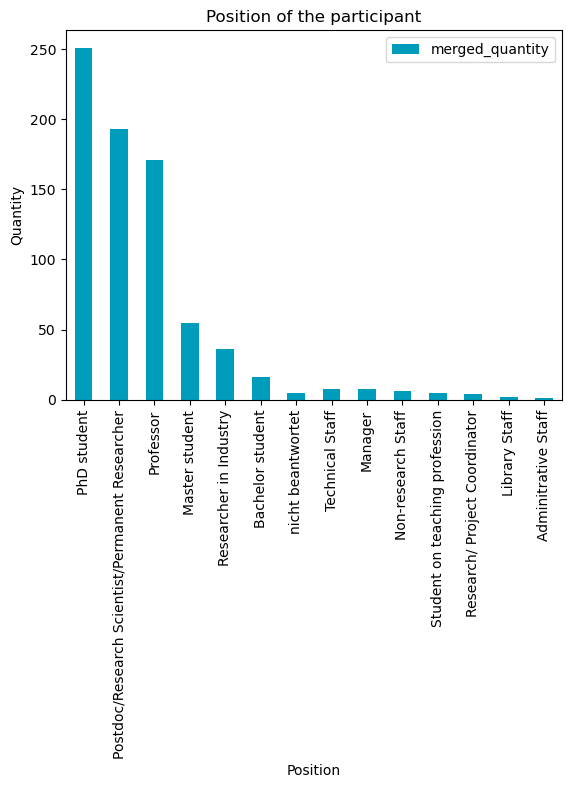

In [67]:
# Setze die Spalte "position" als Index
df_A003_merge.set_index('position', inplace=True)

df_A003_merge.plot.bar(color=petrol_rgb)

plt.xlabel('Position')
plt.ylabel('Quantity')
plt.title('Position of the participant')

# Zeige das Diagramm an
plt.show()

## A04. To which discipline do you assign yourself?

In [68]:
# Spalten mit Namen, die "A004" enthalten, anzeigen
df_A004 = df_cleanquest_2023.filter(like='A004')
df_A004

,A004,A004_01,A004_02,A004_03,A004_04,A004_05,A004_06,A004_07,A004_08,A004_09,A004_10,A004_11,A004_12,A004_13,A004_13a
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Cheminformatics
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Atmospheric chemistry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
807,7.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,Polymer Chemistry.
809,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
810,4.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN


In [69]:
# Leeres Dictionary für die Werte erstellen
values_dict = {}

# For-Schleife
for col_name in df_A004:
    values_dict[col_name] = df_values[df_values["VAR"] == col_name]

# Ergebnisse anzeigen
for col_name, values_df in values_dict.items():
    print(f"Values for {col_name}:")
    print(values_df)
    print()

Values for A004:
Empty DataFrame
Columns: [VAR, RESPONSE, MEANING]
Index: []

Values for A004_01:
         VAR  RESPONSE        MEANING
269  A004_01         1  nicht gewählt
270  A004_01         2     ausgewählt

Values for A004_02:
         VAR  RESPONSE        MEANING
271  A004_02         1  nicht gewählt
272  A004_02         2     ausgewählt

Values for A004_03:
         VAR  RESPONSE        MEANING
273  A004_03         1  nicht gewählt
274  A004_03         2     ausgewählt

Values for A004_04:
         VAR  RESPONSE        MEANING
275  A004_04         1  nicht gewählt
276  A004_04         2     ausgewählt

Values for A004_05:
         VAR  RESPONSE        MEANING
277  A004_05         1  nicht gewählt
278  A004_05         2     ausgewählt

Values for A004_06:
         VAR  RESPONSE        MEANING
279  A004_06         1  nicht gewählt
280  A004_06         2     ausgewählt

Values for A004_07:
         VAR  RESPONSE        MEANING
281  A004_07         1  nicht gewählt
282  A004_07    

In [70]:
df_variables = pd.DataFrame (variables)

# Zeilen von Index 12 bis 27 anzeigen
selected_rows_A004 = df_variables.iloc[12:27]
selected_rows_A004

,VAR,LABEL,TYPE,INPUT,QUESTION
12,A004,Discipline : Ausweichoption (negativ) oder Anz...,METRIC,SYSTEM,To which discipline do you assign yourself?
13,A004_01,Discipline : Inorganic chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
14,A004_02,Discipline : Organic chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
15,A004_03,Discipline : Physical chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
16,A004_04,Discipline : Chemical engineering,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
17,A004_05,Discipline : Theoretical chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
18,A004_06,Discipline : Pharmacy/Pharmaceutical chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
19,A004_07,Discipline : Material science,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
20,A004_08,Discipline : Biochemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
21,A004_09,Discipline : Analytical chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?


In [71]:
# Spalten umbenennen, so dass Teildisziplin bekannt wird
# Dictionary erstellen
col_name_clear = {
    'A004': 'Ausweichoption (negativ) oder Anzahl',
    'A004_01': 'Inorganic chemistry',
    'A004_02': 'Organic chemistry',
    'A004_03': 'Physical chemistry',
    'A004_04': 'Chemical engineering',
    'A004_05': 'Theoretical chemistry',
    'A004_06': 'Pharmacy/Pharmaceutical chemistry',
    'A004_07': 'Material science',
    'A004_08': 'Biochemistry',
    'A004_09': 'Analytical chemistry',
    'A004_10': 'Metabolomics',
    'A004_11': 'Proteomics',
    'A004_12': 'Medicinal chemistry',
    'A004_13': 'Other',
    'A004_13a': 'open text'
}

df_A004 = df_A004.rename(columns=col_name_clear)
df_A004

,Ausweichoption (negativ) oder Anzahl,Inorganic chemistry,Organic chemistry,Physical chemistry,Chemical engineering,Theoretical chemistry,Pharmacy/Pharmaceutical chemistry,Material science,Biochemistry,Analytical chemistry,Metabolomics,Proteomics,Medicinal chemistry,Other,open text
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Cheminformatics
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Atmospheric chemistry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
807,7.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,Polymer Chemistry.
809,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
810,4.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN


In [72]:
# Anzahl der Werte 2 in den Spalten A004_01 - A004_13 zählen
df_A004_count = df_A004.apply(lambda col: (col == 2).sum()).to_frame()

df_A004_count.reset_index(inplace=True)

df_A004_count.rename(columns={'index':'subdiscipline', 0:'quantity'}, inplace=True)

df_A004_count

,subdiscipline,quantity
0,Ausweichoption (negativ) oder Anzahl,135
1,Inorganic chemistry,206
2,Organic chemistry,250
3,Physical chemistry,146
4,Chemical engineering,56
5,Theoretical chemistry,61
6,Pharmacy/Pharmaceutical chemistry,33
7,Material science,102
8,Biochemistry,74
9,Analytical chemistry,88


In [73]:
print(type(df_A004_count))

<class 'pandas.core.frame.DataFrame'>


In [74]:
df_A004_count = df_A004_count.drop(0)
df_A004_count

,subdiscipline,quantity
1,Inorganic chemistry,206
2,Organic chemistry,250
3,Physical chemistry,146
4,Chemical engineering,56
5,Theoretical chemistry,61
6,Pharmacy/Pharmaceutical chemistry,33
7,Material science,102
8,Biochemistry,74
9,Analytical chemistry,88
10,Metabolomics,14


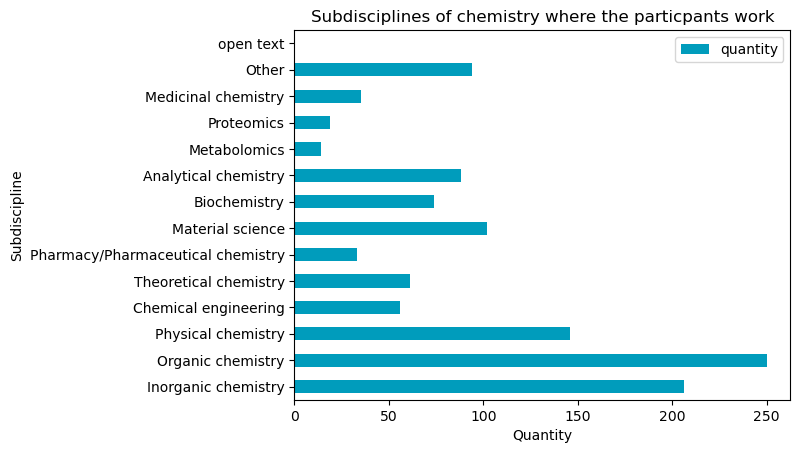

In [75]:
# Setze die Spalte "subdiscipline" als Index
df_A004_count.set_index('subdiscipline', inplace=True)

df_A004_count.plot.barh(color=petrol_rgb)

plt.xlabel('Quantity')
plt.ylabel('Subdiscipline')
plt.title('Subdisciplines of chemistry where the particpants work')

# Zeige das Diagramm an
plt.show()

In [76]:
# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte A004_13a
df_A004_a = df_cleanquest_2023['A004_13a'].value_counts().to_frame()
print(df_A004_a)

                          A004_13a
Technical Chemistry              5
Electrochemistry                 4
Macromolecular Chemistry         4
Polymer chemistry                4
Polymer Chemistry                3
...                            ...
Organometallic Chemistry         1
Atmospheric chemistry            1
Chemical Technology              1
Food chemistry                   1
Polymer Chemistry.               1

[66 rows x 1 columns]


In [77]:
df_A004_a.reset_index(inplace=True)

df_A004_a.rename(columns={'index': 'subdiscipline', 'A004_13a': 'quantity'}, inplace=True)
print(df_A004_a)

               subdiscipline  quantity
0        Technical Chemistry         5
1           Electrochemistry         4
2   Macromolecular Chemistry         4
3          Polymer chemistry         4
4          Polymer Chemistry         3
..                       ...       ...
61  Organometallic Chemistry         1
62     Atmospheric chemistry         1
63       Chemical Technology         1
64            Food chemistry         1
65        Polymer Chemistry.         1

[66 rows x 2 columns]


In [78]:
werte = df_A004_a['subdiscipline'].tolist()

print(werte)

['Technical Chemistry', 'Electrochemistry', 'Macromolecular Chemistry', 'Polymer chemistry', 'Polymer Chemistry', 'Chemical Biology', 'Cheminformatics', 'Computational Chemistry', 'Pharmaceutical Biology', 'Photochemistry', 'Catalysis', 'Food Chemistry', 'Textile Chemistry ', 'Didactis', 'pharmacology', 'polymer chemistry', 'Macromolecular chemistry', 'Computational Engineering', 'DNA nanoscience', 'electrochemistry', 'All of the above', 'Nuclear chemistry', 'Polymer Science', '…', 'Food chemistry ', 'Natural Product Research', 'Home&Personal Care Application lab', 'Phytochemistry', 'Biophysics', 'Heterogeneous Catalysis', 'environmental chemistry', 'Chemical Informationen ', 'Technical Chemistry, Catalysis', 'Industrial Chemistry / Catalysis', 'Didactics', 'technical chemistry', 'Cell Biology', 'Nuclear Chemistry', 'Plastics ', '50% organic 50% inorganic, materials', 'Infrastructure', 'Safety and risk research', 'Geosciences with focus on inorganic chemistry', 'Microplastics - Interdi

In [79]:
# Werte mit gleicher Bedeutung zusammenführen
df_A004_a['subdiscipline'] = df_A004_a['subdiscipline'].apply(lambda x: 'Biology' if 'bio' in x.lower() else 
                                                               ('Catalysis' if 'cat' in x.lower() else 
                                                                ('Technical chemistry' if 'tec' in x.lower() else 
                                                                 ('Environmental chemistry' if 'enviro' in x.lower() else 
                                                                  ('Chemoinformatics' if 'info' in x.lower() or 'com' in x.lower() else 
                                                                   ('Industrial chemistry' if 'ind' in x.lower() else 
                                                                    ('Food chemistry' if 'food' in x.lower() else 
                                                                     ('Organic chemistry' if 'org' in x.lower() or 'syn' in x.lower() else
                                                                      ('Didactics/Teaching' if 'did' in x.lower() or 'tea' in x.lower() else
                                                                       ('Electrochemistry' if 'electro' in x.lower() else
                                                                        ('Polymer chemistry' if 'poly' in x.lower() or 'macro' in x.lower() or 'plas' in x.lower() else x)))))))))))

df_A004_a['subdiscipline'] = df_A004_a['subdiscipline'].replace(['Infrastructure','IT','Research Data Management in Chemistry'],'Infrastructure/RDM')

df_A004_a['subdiscipline'] = df_A004_a['subdiscipline'].replace(['…','All of the above','Not assigned yet'],'Not answered')

df_A004_a['subdiscipline'].value_counts()

Polymer chemistry           11
Organic chemistry            5
Chemoinformatics             5
Catalysis                    5
Technical chemistry          4
Biology                      4
Food chemistry               3
Infrastructure/RDM           3
Not answered                 3
Didactics/Teaching           3
Electrochemistry             2
Environmental chemistry      2
Genomics                     1
Industrial chemistry         1
Agrochemistry                1
Chemical Oceanography        1
Diagnostics                  1
Supramolecular chemistry     1
Safety and risk research     1
Natural Product Research     1
Nuclear Chemistry            1
Phytochemistry               1
Nuclear chemistry            1
DNA nanoscience              1
pharmacology                 1
Textile Chemistry            1
Photochemistry               1
Atmospheric chemistry        1
Name: subdiscipline, dtype: int64

In [80]:
df_A004_a_counted = df_A004_a['subdiscipline'].value_counts().to_frame()

df_A004_a_counted.reset_index(inplace=True)

df_A004_a_counted.rename(columns={'index': 'subdiscipline', 'subdiscipline': 'quantity'}, inplace=True)

# Zusammenführen der DataFrames anhand des gemeinsamen Schlüssels 'subdiscipline'
df_A004_merge = pd.merge(df_A004_count, df_A004_a_counted, on='subdiscipline', how='outer')

# Zusammenführen von quantity_x und quantity_y und Summieren der Werte
df_A004_merge['merged_quantity'] = df_A004_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# Entfernen von doppelten Werten in der Spalte "merged_affiliation"
df_A004_merge.drop_duplicates(subset='subdiscipline', inplace=True)

# Löschen der ursprünglichen Spalten
df_A004_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

df_A004_merge

,subdiscipline,merged_quantity
0,Inorganic chemistry,206.0
1,Organic chemistry,255.0
2,Physical chemistry,146.0
3,Chemical engineering,56.0
4,Theoretical chemistry,61.0
5,Pharmacy/Pharmaceutical chemistry,33.0
6,Material science,102.0
7,Biochemistry,74.0
8,Analytical chemistry,88.0
9,Metabolomics,14.0


In [81]:
# Löschen der Zeile mit Index 12, weil sie in den Freitextantworten aufgeschlüsselt wurde und als solche eingefügt wurden.

rows_to_delete = [12,13]

df_A004_merge = df_A004_merge.drop(rows_to_delete)
df_A004_merge

,subdiscipline,merged_quantity
0,Inorganic chemistry,206.0
1,Organic chemistry,255.0
2,Physical chemistry,146.0
3,Chemical engineering,56.0
4,Theoretical chemistry,61.0
5,Pharmacy/Pharmaceutical chemistry,33.0
6,Material science,102.0
7,Biochemistry,74.0
8,Analytical chemistry,88.0
9,Metabolomics,14.0


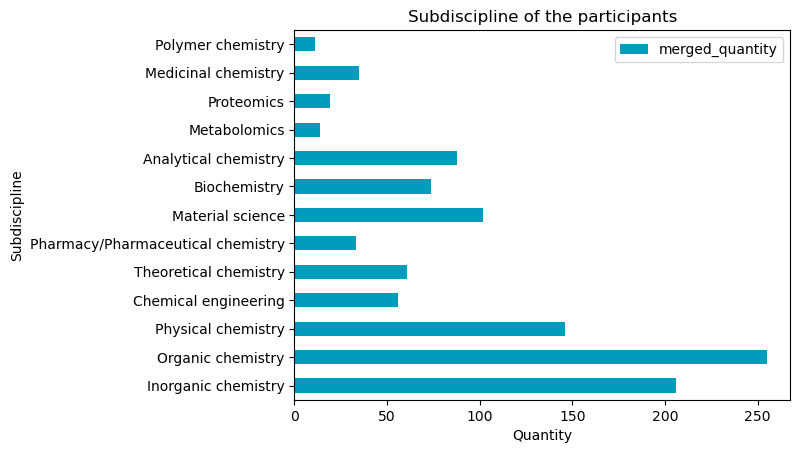

In [82]:
# Setze die Spalte "subdiscipline" als Index
df_A004_merge.set_index('subdiscipline', inplace=True)

# Filtere die Zeilen mit einer Quantity von über 10
df_A004_merge_filter = df_A004_merge[df_A004_merge['merged_quantity'] > 10]

df_A004_merge_filter.plot.barh(color=petrol_rgb)

plt.xlabel('Quantity')
plt.ylabel('Subdiscipline')
plt.title('Subdiscipline of the participants')

# Zeige das Diagramm an
plt.show()